In [3]:
options(warn=-1)
shhh <- suppressPackageStartupMessages # It's a library, so shhh!

shhh(library(gplots))
library(qgraph)
shhh(library(tidyverse))
library("RColorBrewer")

options(warn=0)

In [4]:
data <- read.csv(url("http://cardsorting.net/tutorials/25.csv"))

In [5]:
head(data)

,Uniqid,Category,Startdate,Starttime,Endtime,QID,Carrots,Apple,Banana,Bread,...,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt,Comment
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,2249,Sides,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,1,...,1,0,0,0,0,0,0,0,0,NA
2,2249,meat,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,...,0,1,0,0,1,0,0,0,0,NA
3,2249,dinners,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NA
4,2249,Snacks,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NA
5,2249,breakfasat,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NA
6,2249,Fruit and veggie,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,1,1,1,0,...,0,0,0,0,0,0,0,1,0,NA


In [6]:
data <- data[, -c(1:6)]# delete columns 1 through 6
data <- data[,-ncol(data)]

In [7]:
head(data)

,Carrots,Apple,Banana,Bread,Broccoli,Butter,Cake,Cereal,Cheese,Chicken,...,Pretzels,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
data <- data.frame(data)

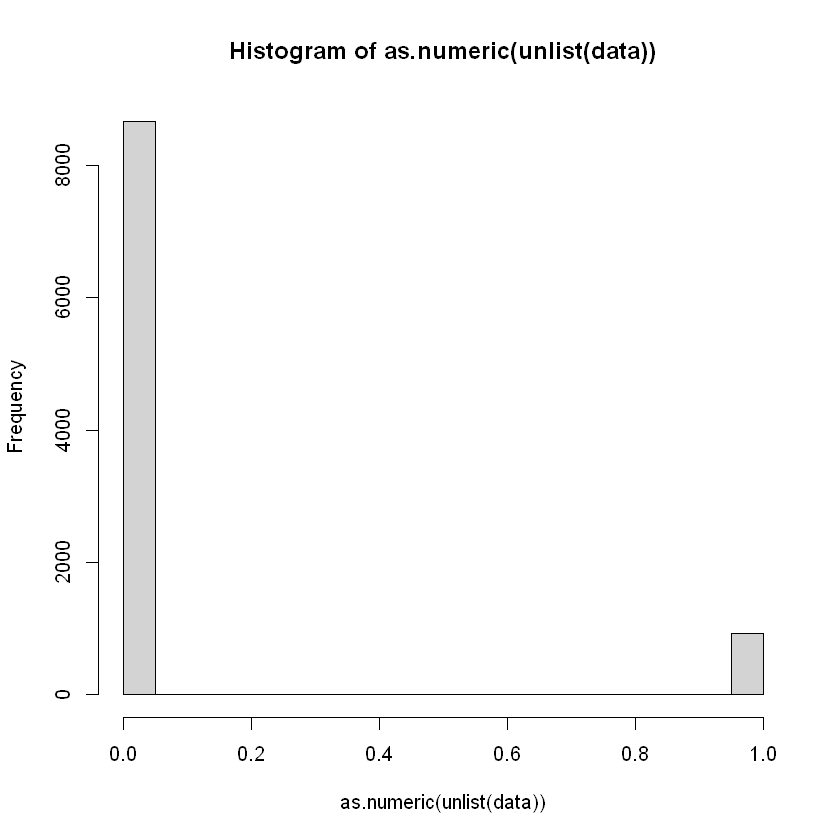

In [9]:
hist(as.numeric(unlist(data)), labels=c(0,1))

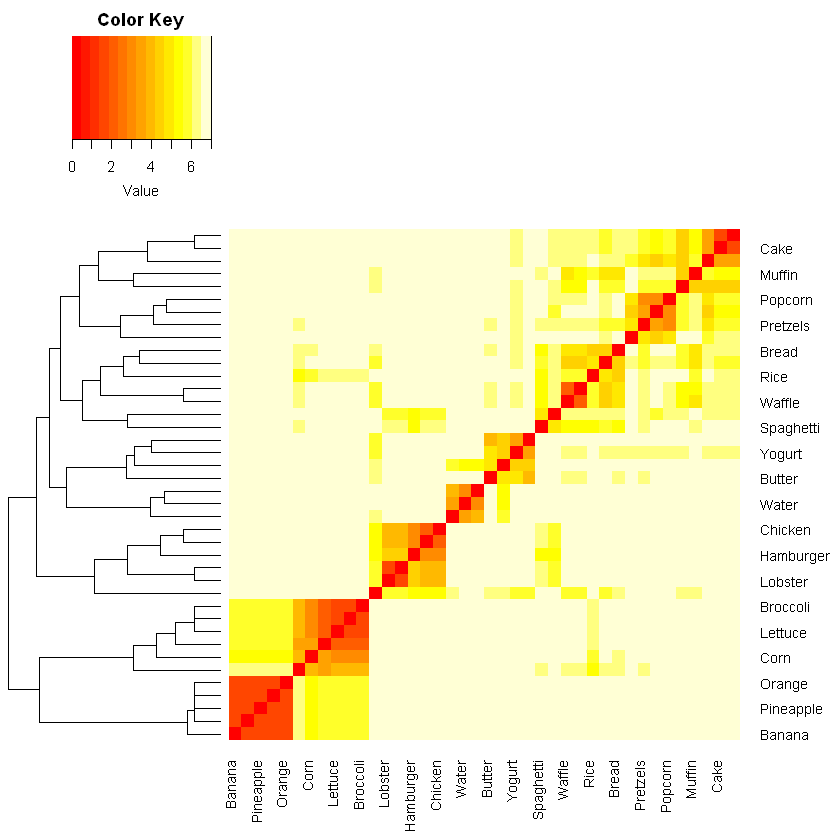

In [10]:
distances = dist(t(data), method="euclidean")
heatmap.2(as.matrix(distances), symkey=FALSE, density.info="none", trace="none", dendrogram ="row")

e)

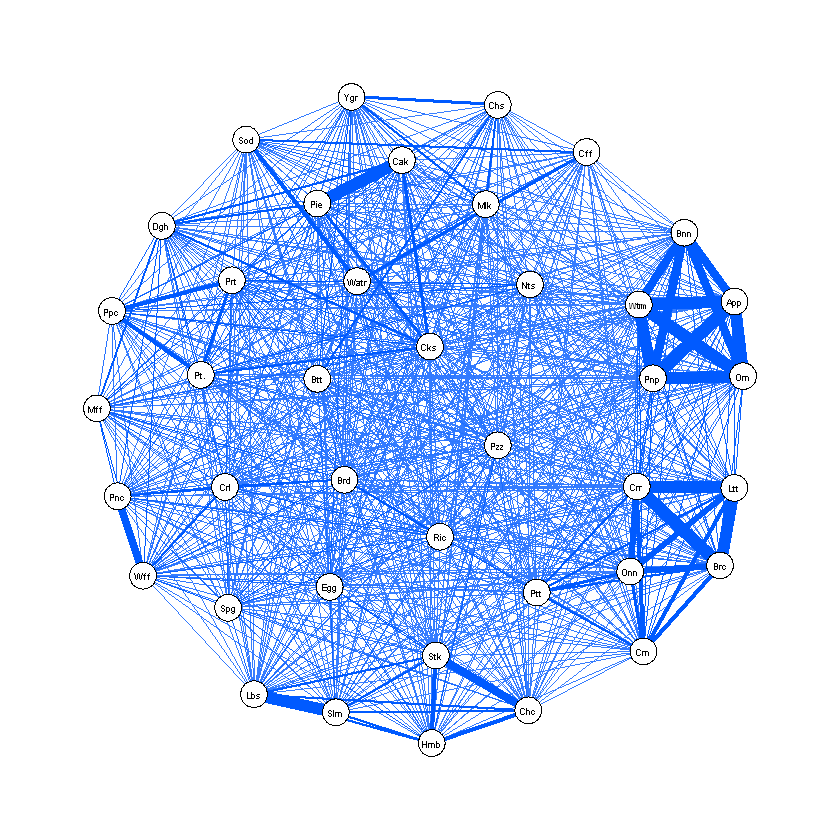

In [47]:
qgraph(1/distances, layout='spring', vsize=3, theme='Hollywood')

In [71]:
# Obtenemos las tarjetas más relacionadas entre sí
min_distance <- min(distances)
cat("Min distance between cards:", min_distance, "\n")

cat("Cards with higher similarity:\n")
min_indexes <- which(as.matrix(distances)==min_distance, arr.ind=TRUE)

names = colnames(data)
correlated_pairs <- data.frame(Item1=character(), Item2=character()) 
for (row in 1:nrow(min_indexes)) {
    new_row <- data.frame(names[min_indexes[row, "row"]],
                          names[min_indexes[row, "col"]])
    names(new_row) <- c("Item1", "Item2")
    
    correlated_pairs <- rbind(correlated_pairs, new_row)
}
correlated_pairs

Min distance between cards: 1.414214 
Cards with higher similarity:


Item1,Item2
<fct>,<fct>
Broccoli,Carrots
Lettuce,Carrots
Orange,Apple
Pineapple,Apple
Watermelon,Apple
Carrots,Broccoli
Lettuce,Broccoli
Pie,Cake
Carrots,Lettuce
